###  Predict labels fro unlabelled image
#### 1.1 Predict random unlabelled test images

Set tensorflow environment
```python
source activate tensorflow_p36
```
Cloudy should have no other labels



In [1]:
import matplotlib.pyplot as plt
from keras.models import load_model
import keras.backend as K
import seaborn as sns
import numpy as np
import pandas as pd
import cv2
from a02_custom_metrics import precision,recall,F2_score
from a01_custom_layer import Scale

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
kaggle_path = '/home/ubuntu/.kaggle/competitions/planet-understanding-the-amazon-from-space/'
weather = [ 'clear', 'partly_cloudy','cloudy', 'haze']
land_use = ['primary', 'agriculture', 'road', 'water','cultivation', 'habitation','bare_ground', 
            'conventional_mine', 'selective_logging', 'artisinal_mine', 'blooming','slash_burn', 'blow_down' ]

In [3]:
read = lambda i: cv2.imread(kaggle_path+f'test_clean/test_{i}.jpg')
# cnn = load_model('haze_free_cnn.h5',custom_objects={'F2_score': F2_score})
dense = load_model('b01_dense121.h5',custom_objects={'F2_score': F2_score,'Scale':Scale})
X_val = np.array(list(map(read,range(8000))))

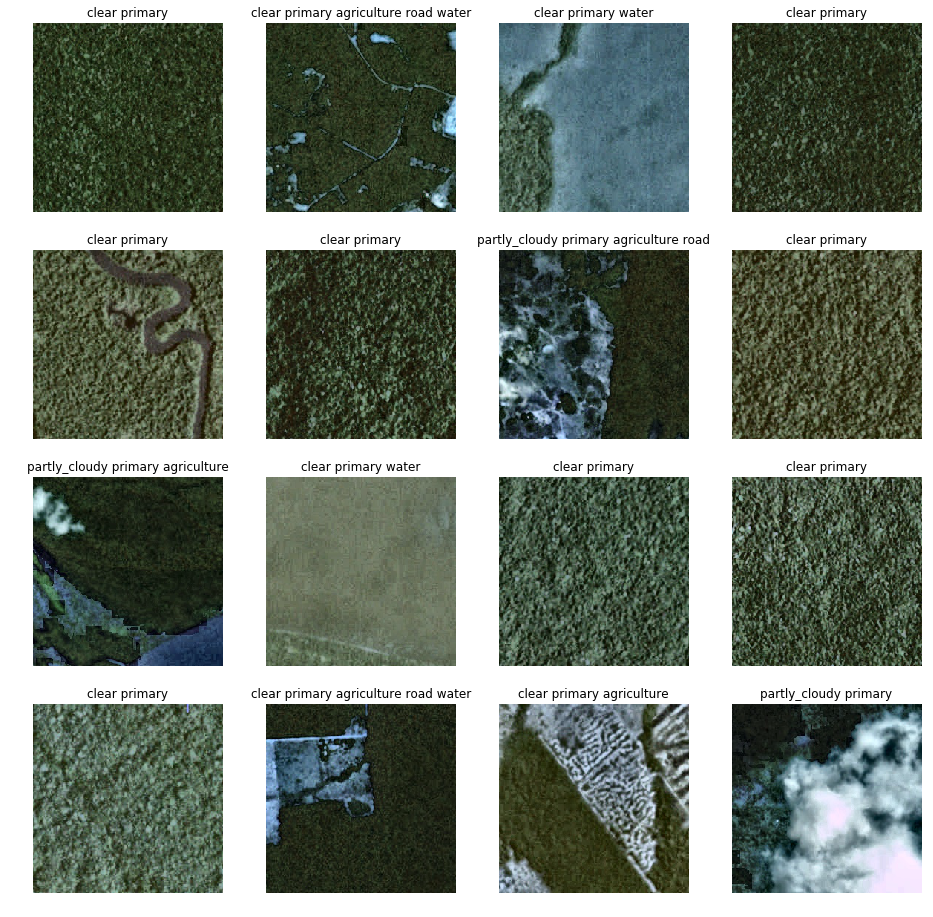

In [4]:
def generate_labels(model,rows=4,columns=4):
    fig = plt.figure(figsize=(16, 16))
    for i in range(1, columns*rows +1):
        ax = fig.add_subplot(rows, columns, i)

        img  = X_val[np.random.choice(range(8000))]
        weather_, land_ = model.predict(img.reshape(1,256,256,3))
        label = []
        label.append(weather[np.argmax(weather_, axis=1)[0]])
        b = (land_>0.5)*1
        for i in np.where(b[0]==1)[0]:
            label.append(land_use[i])
        if 'cloudy' in label:
            print (weather_)
            if len(label) > 1:
                label[0] = 'partly_cloudy'
        title = ' '.join(label)
        ax.set_title(title)
        ax.set_axis_off()
        plt.imshow(img)
        

generate_labels(model=dense)
plt.show()



In [64]:
import glob
kaggle_path = '/home/ubuntu/.kaggle/competitions/planet-understanding-the-amazon-from-space/'
x = glob.glob(kaggle_path+'test_clean/test_*.jpg')
x = sorted([int(i.split('_')[-1].rstrip('.jpg')) for i in x])
x[8600]

8600

#### 1.1 Show the illegal mines (artisinal mine)
- test sample 10k

In [40]:
def output_labels(i,model=dense):
    weather_, land_ = model.predict(X_val[i].reshape(1,256,256,3))
    label = []
    label.append(weather[np.argmax(weather_, axis=1)[0]])
    b = (land_>0.5)*1
    for i in np.where(b[0]==1)[0]:
        label.append(land_use[i])
    if 'cloudy' in label:
        if len(label) > 1:
            label[0] = 'partly_cloudy'
    title = ' '.join(label)
    return title



In [47]:
test = pd.DataFrame(data=list(map(output_labels,range(0,10000))),columns = ['tags'])
mines_id = test[test.tags.str.contains('artisinal_mine')].index.values

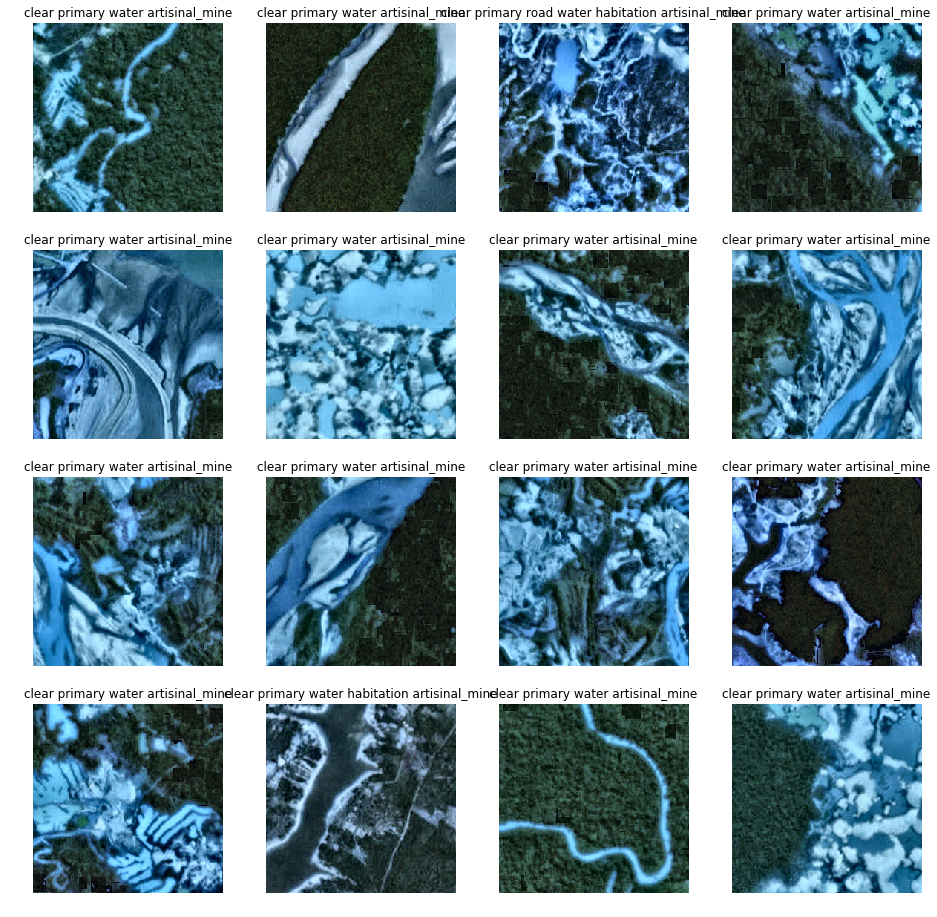

In [58]:
def expose_mines(rows=4,columns=4,model=dense):
    fig = plt.figure(figsize=(16, 16))
    for i in range(1, columns*rows +1):
        ax = fig.add_subplot(rows, columns, i)
        j = np.random.choice(mines_id)
        img  = X_val[j]
        title = test.tags[j]
        ax.set_title(title)
        ax.set_axis_off()
        plt.imshow(img)
        
        

expose_mines()
plt.show()